<h1 align=center> Análisis Exploratorio de Datos </h1>

---

En este notebook procedemos a analizar los dataset que fueron fragmentados anteriormente en el archivo [intro.ipynb](intro.ipynb).

Para comenzar hay que importar las librerías con las que se trabajará y se realizará el análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

<h3 align= center>
¿De qué se trata este Análisis?
</h3>

<p>
Este análisis se trata de los datos que nos brinda la Ciudad de Buenos Aires respecto a la información que ellos recopilaron durante los años 2016 a 2021, sobre los sinietros viales que tuvieron lugar en este territorio.
</p>

Se puede tener acceso a los datasets que brinda el gobierno de la Ciudad de Buenos Aires a través de su [página oficial](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales).


<p align=center><img src="./data/assets/R.png" height=100><img src="./data/assets/3-siniestros-viales.jpg" height=160></p>

<h3 align=center>¿Qué clase de contenido podremos encontrar en este análisis?</h3>

<p>En este análisis podremos encontrar los siguientes segmentos:</p>
<ul>
  <li><a href="#valores-nulos">Valores Nulos o Faltantes</a></li>
  <li><a href="#outliers">Valores Atípicos u 'Outliers'</a></li>
  <li><a href="#graphics">Análisis de datos</a></li>
</ul>

Como primera medida, y antes de poder analizar los archivos con la información, hay que abrirlos. Por eso utilizaremos la librería ```pandas```.

In [2]:
incidentes = pd.read_csv("./data/Incidente.csv")
localizacion = pd.read_csv("./data/Localizacion.csv")
victimas = pd.read_csv("./data/Victimas.csv")
tabla_calles = pd.read_csv("./data/tipo_Calle.csv")
tabla_acusados = pd.read_csv("./data/Type_Acusados.csv")
tabla_victimas = pd.read_csv("./data/Type_Victimas.csv")

<h3 id="valores-nulos" align=center> 
<em>
Valores Faltantes o Nulos 
</em>
</h3>

Iniciaremos viendo la cantidad de nulos de los dataset de la siguiente manera:

||Columna|Columna2|Columna3|
|:-:|:------:|:------:|:-:|
|**Cantidad de nulos**|5|0|1|

Primero, con el dataset de incidentes.

In [3]:
pd.DataFrame(dict(incidentes.isna().sum()), index=['Cantidad de nulos'])

,ID,N_VICTIMAS,FECHA,HORA,PARTICIPANTES,VICTIMA,ACUSADO
Cantidad de nulos,0,0,0,0,0,0,0


Wow! El dataset de incidentes no contiene valores nulos. No le falta ningún dato a ninguna columna.

A continuación, seguimos con el dataset de la localización.

In [4]:
pd.DataFrame(dict(localizacion.isna().sum()), index= ["Cantidad de nulos"])

,ID,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y
Cantidad de nulos,0,0,0,0,0,0,0,0,0,1,567,171,8,0,0,0,0


Bueno... Al parecer este dataset tiene falta de valores en algunas de sus columnas. Esto puede deberse a distintos factores, pero una de la razones podría deberse a que en ocasiones, los sinietros viales ocurren en un cruce de calle de la ciudad y en otra ocasiones ocurre en el medio de una cuadra, lo que podría producir la falta de datos en las columnas de `Altura` y `Cruce`.

Podemos verificar que esta es la razón sumando la cantidad de los datos que hay en ambas columna y comparando con la longitud total de sinietros registrados. Si las cantidades son idénticas significa que la falta de un dato en una columna es completado con el valor del dato que está en la otra columna:

In [5]:
print(f"La suma de los valores es: {dict(localizacion.notna().sum())['Altura'] + dict(localizacion.notna().sum())['Cruce']}")
print(f"La longitud del dateset es: {localizacion.shape[0]}")

La suma de los valores es: 654
La longitud del dateset es: 696


Como nos indican los cálculos, existe una diferencia entre la cantidad de datos reales que hay en ambas columna y la longitud del dataset. Es decir, habrá filas en el dataset que no contendrán un valor asociado a la altura o al cruce donde sucedió ese sinietro, específicamente.

Pasemos al dataset de las víctimas.

In [6]:
pd.DataFrame(dict(victimas.isna().sum()), index= ["Cantidad de nulos"])

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
Cantidad de nulos,0,0,0,0,0,0,0,0,0,0


Este dataset tampoco contiene valores nulos.

`Aclaración:` *Los dataset que nombramos como "tablas_..." son referencia de los valores que están en las tablas que ya analizamos.*

Por ejemplo: tabla_calles
|ID_Calle   |Calificación|Descripción|
|:---------:|:----------:|:---------:|
|0|AVENIDA|Arteria cuya calzada tiene...|
|1|GRAL PAZ| Avenida Gral. Paz, ambos sentidos...|
|...|...|...|

---

<h2 id="outliers" align= center>
<em>
Valores atípicos u 'Outliers'
</em> </h2>

En este segmento, cabe aclarar, no se puede hacer un análisis de valores atípicos a cada columna o a todas las tablas, ya que no todas las columnas contiene variables numéricas o, simplemente, su análisis no aportaría nada relevante; como por ejemplo el análisis de datos atípicos a las alturas de las calles sería inutil y no aportearía información importante.

Comencemos analizando la tabla de *incidentes*, especialmente, en la columna del número de víctimas.

PD: `La anchura del gráfico nos indica la densidad de la distribución.`

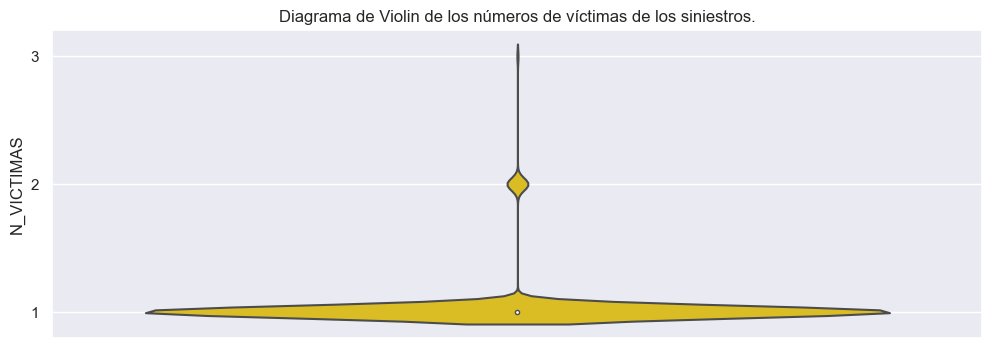

In [7]:
plt.figure(figsize=(12, 4))
sns.violinplot(y= incidentes['N_VICTIMAS'], color="#f8d107")

plt.yticks([1, 2, 3])
plt.title("Diagrama de Violin de los números de víctimas de los siniestros.")

plt.show()

In [8]:
incidentes['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

Como nos muestra el diagrama, la mayoría de accidentes viales tienen solamente una víctima. En una muy pequeña cantidad, suceden sinietros donde están involucradas dos víctimas. Y en una sola ocasión ocurrió un sinietro con tres víctimas.

Ahora veamos como se distribuye los sinistros según el tipo de calle donde pasó:

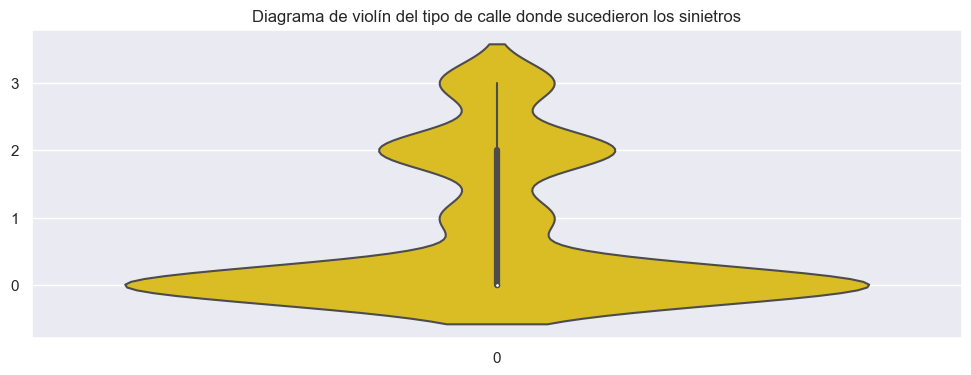

In [9]:
plt.figure(figsize=(12,4))

sns.violinplot(localizacion['TIPO_DE_CALLE'], color="#f8d107")

plt.yticks([0,1,2,3])
plt.title("Diagrama de violín del tipo de calle donde sucedieron los sinietros")
plt.show()

Veamos la tabla de los diferentes tipos de calles.

In [10]:
tabla_calles

,ID_calle,Calificacion,Descripcion
0,0,AVENIDA,Arteria cuya calzada tiene un ancho total de p...
1,1,GRAL PAZ,"Avenida General Paz, ambos sentidos. Incluye i..."
2,2,CALLE,Arteria cuya calzada tiene un ancho conprendid...
3,3,AUTOPISTA,Via multicarril con calzadas para ambas manos ...


In [11]:
localizacion['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
0    429
2    136
3     66
1     65
Name: count, dtype: int64

Si hacemos la comparación con la tabla, podemos ver que la mayoria de los siniestros ocurrieron en avenidas y calles. En cantidades menores también sucedieron algunos accidentes en autopistas y en la Gral. Paz.

---

<h3 id="graphics" align= center>
<em>
Análisis de los datos, con gráficos.
</em></h3>

Veamos ahora la cantidad de víctimas que hubo por año en la Ciudad de Buenos Aires.

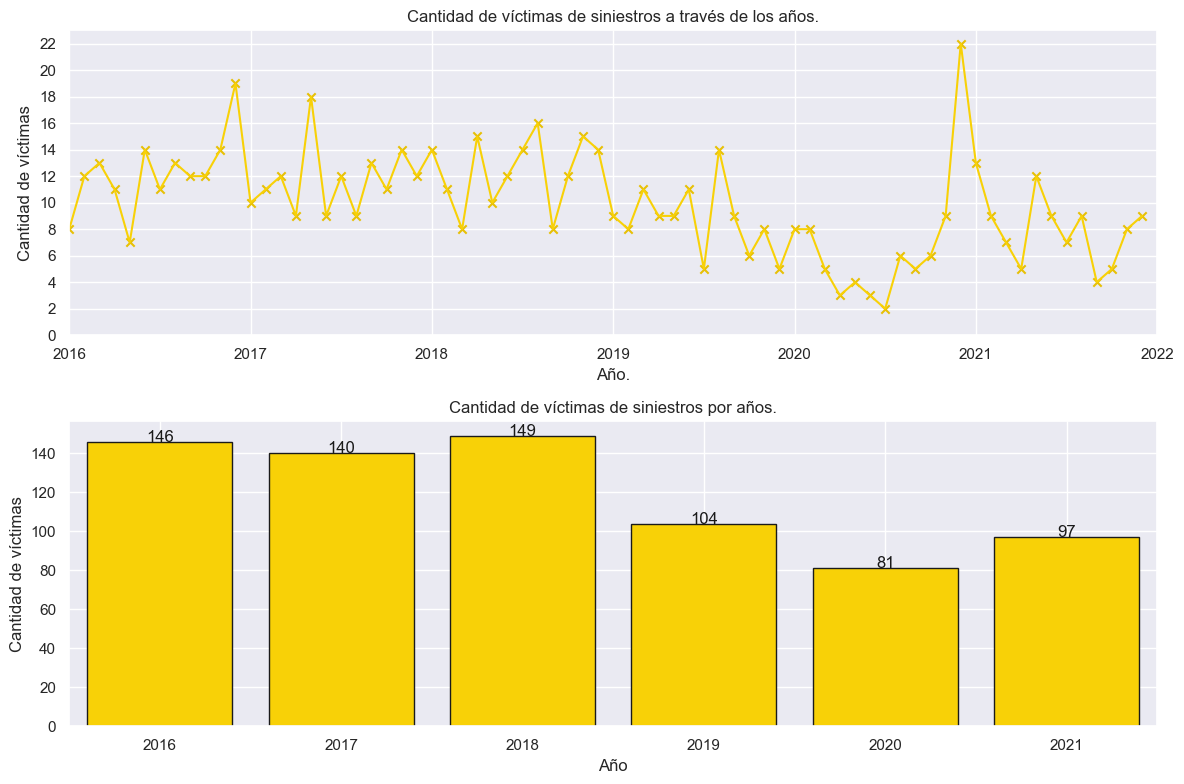

In [12]:
merge = incidentes.merge(localizacion, how= 'inner', left_on='ID', right_on="ID")

# Definimos un diccionario que tendrá los años y la cantidad de víctimas:
dict_ano_mes = {}
dict_ano = {}
for anio, mes, n_vict in merge[['AAAA', 'MM','N_VICTIMAS']].values:
    dict_ano_mes[f"{int(anio)}"] = {}

for anio, mes, n_vict in merge[['AAAA', 'MM', 'N_VICTIMAS']].values:
    dict_ano_mes[F"{int(anio)}"][f"{mes}"] = 0
    dict_ano[f"{anio}"] = 0

for anio, mes, n_vict in merge[['AAAA', 'MM', 'N_VICTIMAS']].values:
    dict_ano_mes[F"{int(anio)}"][f"{mes}"] += n_vict
    dict_ano[f"{anio}"] += n_vict

final = {}
for key in dict_ano_mes.keys():
    final[f"{key}"] = {}
    for month in dict_ano_mes[f"{key}"].keys():
        final[f"{key}"][f"{(int(month) - 1)  / 12}"] = dict_ano_mes[f"{key}"][f"{month}"]

final2 = {}
for k in final.keys():
    for z in final[f"{k}"]:
        final2[f"{int(k) + float(z)}"] = final[f"{k}"][f"{z}"]

values_x = [float(x) for x in final2.keys()]
values_y = list(final2.values())

fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0].plot(values_x, values_y, color= '#f8d107')
ax[0].scatter(values_x, values_y, color= '#e7c006', marker='x')

ax[0].set_yticks(np.linspace(0,22,12))
ax[0].set_title("Cantidad de víctimas de siniestros a través de los años.")
ax[0].set_xlabel("Año.")
ax[0].set_ylabel("Cantidad de víctimas")
ax[0].set_xlim(2016,2022)

for k, v in dict_ano.items():
    ax[1].bar(int(k), v, color= '#f8d107', edgecolor='k')
    ax[1].text(int(k), v, str(v), color= 'k', ha='center', va='baseline')

ax[1].set_title("Cantidad de víctimas de siniestros por años.")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Cantidad de víctimas")
ax[1].set_xlim(2015.5, 2021.5)

plt.tight_layout()
plt.show()

In [13]:
100 - (dict_ano['2019'] * 100 / dict_ano['2016'])

28.76712328767124

El gráfico nos muestra una realidad bastante obvia: la pandemia de **Co-Vid-19** tuvo incidencia en la disminución abrupta de víctimas en el año 2020. Pero un año después, cuando se normaliza un poco más el transito de vehículos la tasa de víctimas de siniestro viales volvió a aumentar.

Aunque podemos afirmar, que las políticas viales tuvieron éxito. Ya que, desde el 2016 al 2019, la cantidad de víctimas disminuyó **28,8%**; de 146 a 104. Como último dato, en 2021, disminuyó a 97 víctimas.

<p align= left>¿Cómo estuvieron las comunas?</p>
<p><em> Veamos los siguientes gráficos: </em></p>

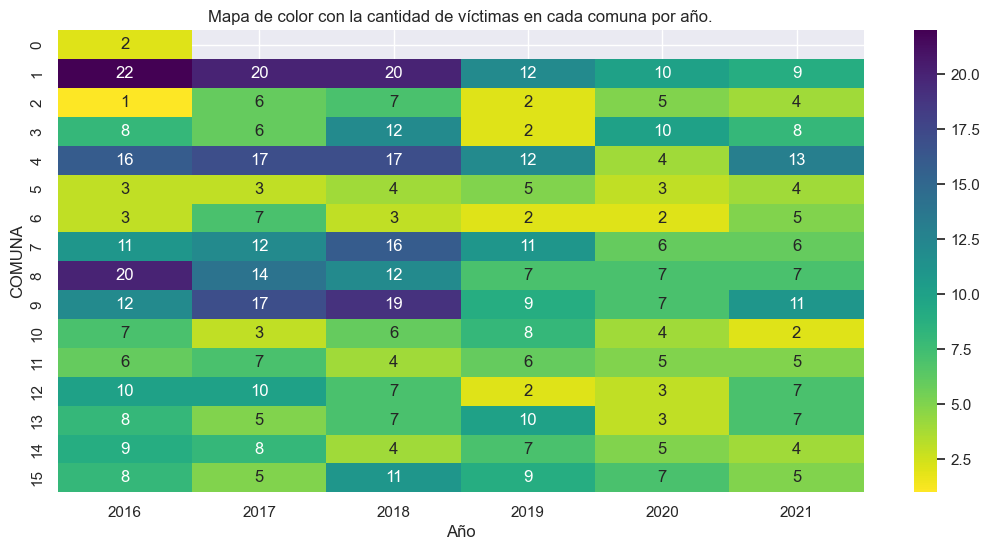

In [27]:
pivot = merge.groupby(['AAAA','COMUNA']).agg({'N_VICTIMAS':'sum'})
pivot = pivot.reset_index()
pivot = pivot.pivot_table(values='N_VICTIMAS', index='COMUNA', columns='AAAA')

plt.figure(figsize=(13,6))
sns.heatmap(pivot, cmap= 'viridis_r', annot= True, fmt= '.0f', cbar= True)


plt.title("Mapa de color con la cantidad de víctimas en cada comuna por año.")
plt.xlabel("Año")
plt.show()

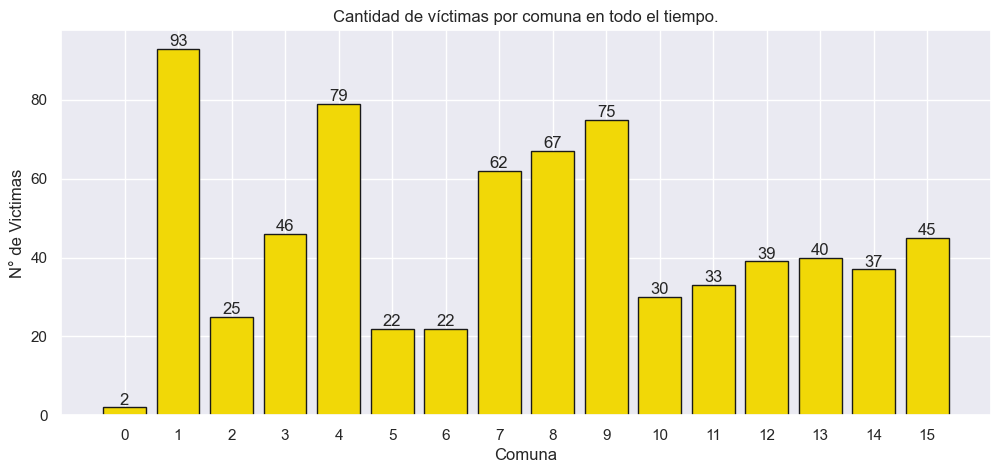

In [25]:
comunas = merge.groupby("COMUNA").agg({'N_VICTIMAS':"sum"})
comunas.reset_index(inplace= True)

plt.figure(figsize=(12,5))
plt.bar(comunas['COMUNA'].values, comunas["N_VICTIMAS"].values, color='#f1d807', edgecolor="k")

for x, y in comunas[['COMUNA',"N_VICTIMAS"]].values:
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.title("Cantidad de víctimas por comuna en todo el tiempo.")
plt.xticks(comunas['COMUNA'].values)
plt.xlabel("Comuna")
plt.ylabel("N° de Victimas")

plt.show()

Como nos muestran ambos gráficos, las comunas tuvieron diferentes cantidades de víctimas por los accidentes. Las comunas que más víctimas tuvieron fueron las comunas 1 y 4. El resto de comunas también tuvieron sus respectivas cantidades, pero no en la medida de las comuna 1 y 4.

<p> ¿Cómo eran las víctimas? Porque hasta ahora hemos hablado de ellas como solamente números, profundicemos es la edad que tenían, su sexo o que estaban haciendo cuando tuvieron el accidente.</p>

In [28]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,0,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,1,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,0,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,0,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,0,MASCULINO,29,2016-02-01 00:00:00


In [29]:
tabla_victimas

,Type_Victim,Calificacion,Descripcion
0,0,MOTO,Vehiculo a motor no carrozado que incluye moto...
1,1,AUTO,Vahículo a motor destinado al transporte de pe...
2,2,PEATON,Víctima distinta de cualquier ocupante de un v...
3,3,SD,Sin datos sobre el tipo de víctima.
4,4,CARGAS,Vehículo a motor destinado al transporte de ca...
5,5,BICICLETA,"Vehículo con al menos dos ruedas, que generalm..."
6,6,PASAJEROS,"Personas lesionadas que se encuantran dentri, ..."
7,7,MOVIL,"Vehículos de emergencia: moviles policiales, a..."
8,8,OBJETO FIJO,Colisión con objetos inmóviles fijados de mane...
9,9,PEATON_MOTO,NaN


In [41]:
genero = victimas.groupby("SEXO").agg({"VICTIMA":"count"})
genero.reset_index(inplace=True)
genero['SEXO'].values

array(['FEMENINO', 'MASCULINO', 'SD'], dtype=object)

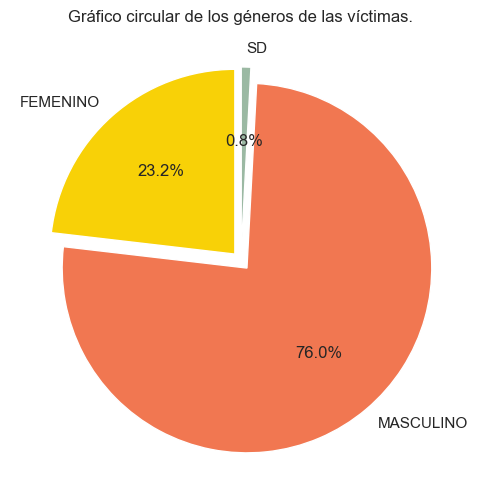

In [61]:
plt.figure(figsize=(8,6))
plt.pie(x= genero['VICTIMA'].values, labels= genero['SEXO'].values, explode=(0.05, 0.05, 0.05), autopct="%1.1f%%", startangle=90, colors=["#F8d107", "#f17751", "#9bb9a3"])

plt.title("Gráfico circular de los géneros de las víctimas.")
plt.show()

<p>El <strong>76% de las víctimas</strong> son de género masculino. El <strong>23,2% de la víctimas</strong> son de género femenino. Y solamente el <strong>0.8% de las víctimas</strong> no tiene información sobre su sexo. </p>

Las personas de género masculino tienen más probabilidad de tener accidentes viales. Casi tres veces más de posibilidad que las personas de género femenino.